<a href="https://colab.research.google.com/github/LucaT16/loc4tor/blob/master/Python%20Scripts/loc4tor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loc4tor

### Import TensorFlow

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import pickle

from tensorflow.keras import datasets, layers, models
from tensorflow.keras import losses 
import matplotlib.pyplot as plt

### Read Dataset

In [87]:
train_images = pickle.load(open("x.pickle","rb")) 
train_labels = pickle.load(open("y.pickle","rb")) 

train_images = train_images/255.0

### Verify the data

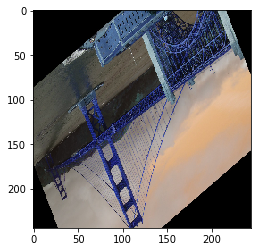

In [88]:
plt.imshow(train_images[0])
plt.show()


### Create the convolutional base

In [4]:
IMG_SIZE = 244

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape= (IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 119, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 207936)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

### Compile and train the model

In [1]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

NameError: name 'model' is not defined

### Evaluate the model

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [0]:
print(test_acc)

### Save the model

In [7]:
MODEL_DIR = "models/loc4tor"
export_path = os.path.join(MODEL_DIR)
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

export_path = models/loc4tor

INFO:tensorflow:Assets written to: models/loc4tor/assets
